<a href="https://colab.research.google.com/github/FerminMendez/ModuleAI/blob/main/M2_ML_usign_framework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Importación de datos

Tenemos el dataset students. Buscamos predecir la calificación de un estudiante.
# DATA SOURCE https://archive.ics.uci.edu/dataset/320/student+performance


## 1.1 Obtener los archivos csv como dataframes.

In [311]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [312]:
%cd "/content/gdrive/MyDrive/DataSetIA/Student"
!ls


/content/gdrive/MyDrive/DataSetIA/Student
student-mat.csv  student+performance.zip  student.txt
student-merge.R  student-por.csv


In [313]:

# Logistic regresion model by Fermín Méndez A01703366
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
# main.py

# Import other libraries


# 1. Import the dataset
# Read the CSV file into a DataFrame

# Read the original files
df_mat = pd.read_csv('student-mat.csv',sep=';')
df_por = pd.read_csv('student-por.csv',sep=';')
#common_columns = ["school", "sex", "age", "address", "famsize", "Pstatus", "Medu", "Fedu", "Mjob", "Fjob", "reason", "nursery", "internet"]


## 1.2 Obtenemos un dataset "data" estandarizado

1.   Vamos a crear un booleano donde math=1 significa que el registro corresponde a la materia de matemáticas mientras que
2.   Unamos el dataset en Data
3.   Sustituimos "yes" por un 1 y "no" por un 0
4.   Creamos una promedio de todas las calificaciones

In [314]:
# 1
df_mat["math"]=1
df_por["math"]=0
# 2
data= pd.concat([df_mat, df_por], axis=0)
data.reset_index(drop=True, inplace=True)

# 3
data = data.replace({'yes': 1, 'no': 0})
data['grade']=data[['G1','G2','G3']].mean(axis=1)
data['math'].describe()
#Map values
#School
data = data.replace({'GP': 1, 'MS': 0})
#Sex
data = data.replace({'F': 1, 'M': 0})
# adress
data = data.replace({'U': 1, 'R': 0})
# famsize
data = data.replace({'LE3': 1, 'GT3': 0})
# P status
data = data.replace({'T': 1, 'A': 0})

## 1.3 Discriminamos las variables que vamos a utilizar para nuestro modelo de predicción

Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

###Variables que parecen poco significativas con relación al promedio
1. school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2. sex - student's sex (binary: "F" - female or "M" - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: "U" - urban or "R" - rural)
5. famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
20. nursery - attended nursery school (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)



### Varibales difíciles de tratar
6. Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
9. Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
10. Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
11. reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
12. guardian - student's guardian (nominal: "mother", "father" or "other")

### Variables que vamos a incluir en la regresión en orden de importancia
22. internet - Internet access at home (binary: yes or no)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
30. absences - number of school absences (numeric: from 0 to 93)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
7. Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8. Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
<
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)


## 1.4 Analizar nuestra variables más significativas

In [315]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      1044 non-null   int64  
 1   sex         1044 non-null   int64  
 2   age         1044 non-null   int64  
 3   address     1044 non-null   int64  
 4   famsize     1044 non-null   int64  
 5   Pstatus     1044 non-null   int64  
 6   Medu        1044 non-null   int64  
 7   Fedu        1044 non-null   int64  
 8   Mjob        1044 non-null   object 
 9   Fjob        1044 non-null   object 
 10  reason      1044 non-null   object 
 11  guardian    1044 non-null   object 
 12  traveltime  1044 non-null   int64  
 13  studytime   1044 non-null   int64  
 14  failures    1044 non-null   int64  
 15  schoolsup   1044 non-null   int64  
 16  famsup      1044 non-null   int64  
 17  paid        1044 non-null   int64  
 18  activities  1044 non-null   int64  
 19  nursery     1044 non-null  

In [316]:
df=data.copy()
selected = ['school','sex','address','famsize','Pstatus','internet', 'studytime', 'absences', 'failures', 'traveltime', 'health','schoolsup', 'famsup', 'paid', 'higher', 'famrel', 'freetime', 'Medu', 'Fedu','Dalc', 'Walc']
target = ['grade']
df=df[selected+target]
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      1044 non-null   int64  
 1   sex         1044 non-null   int64  
 2   address     1044 non-null   int64  
 3   famsize     1044 non-null   int64  
 4   Pstatus     1044 non-null   int64  
 5   internet    1044 non-null   int64  
 6   studytime   1044 non-null   int64  
 7   absences    1044 non-null   int64  
 8   failures    1044 non-null   int64  
 9   traveltime  1044 non-null   int64  
 10  health      1044 non-null   int64  
 11  schoolsup   1044 non-null   int64  
 12  famsup      1044 non-null   int64  
 13  paid        1044 non-null   int64  
 14  higher      1044 non-null   int64  
 15  famrel      1044 non-null   int64  
 16  freetime    1044 non-null   int64  
 17  Medu        1044 non-null   int64  
 18  Fedu        1044 non-null   int64  
 19  Dalc        1044 non-null  

### 1.4.1 Plot matrix

In [317]:
#pd.plotting.scatter_matrix(df);


### 1.4.2 Matriz de correlación

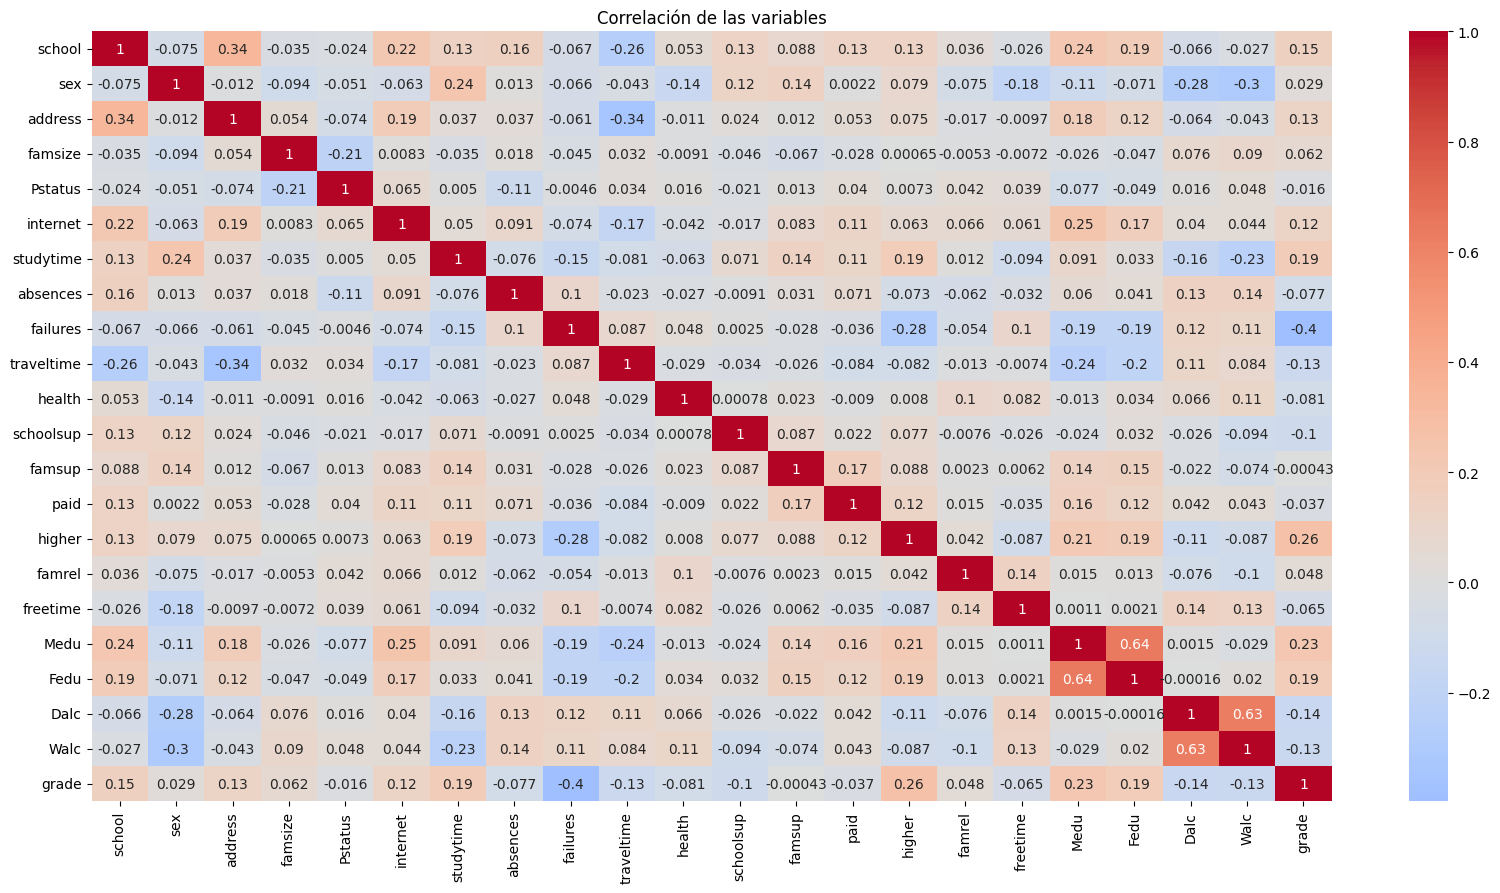

In [318]:
correlation_matrix=df.corr()# Set up the heatmap figure
plt.figure(figsize = (20, 10))
# Create heatmap using seaborn
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", center = 0)
# Show the plot
plt.title("Correlación de las variables")
plt.show()

### 1.4.3 Reducción de dimensionalidad con PCA

In [319]:
df=data.copy()
selected = ['school','sex','address','famsize','Pstatus','internet', 'studytime', 'absences', 'failures', 'traveltime', 'health','schoolsup', 'famsup', 'paid', 'higher', 'famrel', 'freetime', 'Medu', 'Fedu','Dalc', 'Walc','math']
target = ['grade']
df_X = df[selected]
df_Y = df[target]
df_x=df_X.copy()
df_y=df_Y.copy()

In [320]:
from sklearn.decomposition import PCA  # 1. Choose the model class
pca = PCA(n_components=2)              # 2. Instantiate the model with hyperparameters
pca.fit_transform(df_x)                # 3. Fit to data. Notice y is not specified!
X_2D = pca.transform(df_x)
df_x['PCA1'] = X_2D[:, 0]
df_x['PCA2'] = X_2D[:, 1]
df_x['grade']=df_y
pca.explained_variance_

array([38.65097398,  2.39955523])

In [321]:
df_x.columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'internet',
       'studytime', 'absences', 'failures', 'traveltime', 'health',
       'schoolsup', 'famsup', 'paid', 'higher', 'famrel', 'freetime', 'Medu',
       'Fedu', 'Dalc', 'Walc', 'math', 'PCA1', 'PCA2', 'grade'],
      dtype='object')

<Axes: xlabel='PCA1', ylabel='grade'>

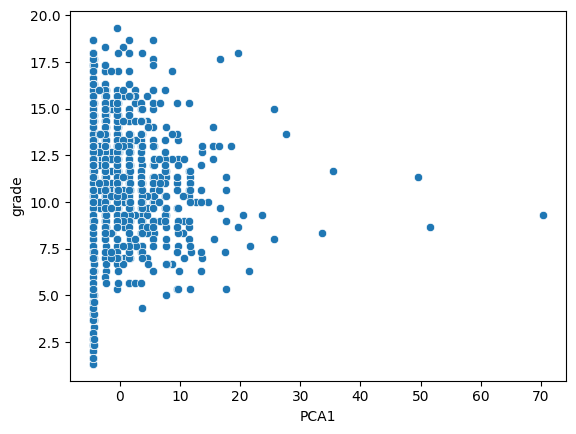

In [322]:
sns.scatterplot(x='PCA1',y='grade',data=df_x)

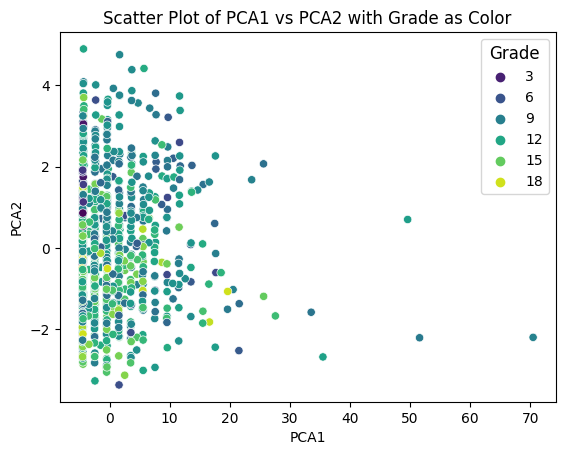

In [323]:
scatterplot = sns.scatterplot(x='PCA1', y='PCA2', hue='grade', data=df_x, palette='viridis')

# Customize the colorbar label
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Scatter Plot of PCA1 vs PCA2 with Grade as Color')

# Add a colorbar to the plot
cbar = scatterplot.legend(title='Grade')
cbar.get_title().set_fontsize(12)


# 2 Modelo de predicción

In [324]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def result_model(model,X_train, X_test, y_train, y_test):
  y_fit_train = model.predict(X_train)
  mse_train = mean_squared_error(y_train, y_fit_train)
  r2_train = r2_score(y_train, y_fit_train)
  print("TRAIN RESULTS:")
  print("MSE: ",mse_train)
  print("R^2: ",r2_train)
  y_fit_test = model.predict(X_test)
  mse_test = mean_squared_error(y_test, y_fit_test)
  r2_test = r2_score(y_test, y_fit_test)
  print("\nTEST RESULTS:")
  print("MSE: ",mse_test)
  print("R^2: ",r2_test)
  return

def result_mode_class(model,X_train, X_test, y_train, y_test):
  y_pred_rf= model.predict(X_train)
  print("TRAIN RESULTS")
  print("accuarcy", accuracy_score(y_train, y_pred_rf))
  y_pred_rf= model.predict(X_test)
  print("TEST RESULTS")
  print("accuarcy", accuracy_score(y_test, y_pred_rf))
  return



## 2.1 Modelo de regresión lineal

In [325]:
from sklearn.model_selection import train_test_split
df=data.copy()
selected = ['school','sex','address','famsize','Pstatus','internet', 'studytime', 'absences', 'failures', 'traveltime', 'health','schoolsup', 'famsup', 'paid', 'higher', 'famrel', 'freetime', 'Medu', 'Fedu','Dalc', 'Walc','math']
target = ['grade']
df_X = df[selected]
df_Y = df[target]
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.2, random_state=42)

### 2.1.1 Separacion de datos en train y test

Vamos a correr un modelo de regresión lineal

In [326]:
from sklearn.linear_model import LinearRegression
model_lr_1 = LinearRegression(fit_intercept=True)
model_lr_1

LinearRegression()

In [327]:
model_lr_1.fit(X_train, y_train)
#print(model.coef_)
#print(model.intercept_)

LinearRegression()

In [328]:
y_fit = model_lr_1.predict(X_test)

In [329]:
result_model(model_lr_1, X_train, X_test, y_train, y_test)

TRAIN RESULTS:
MSE:  7.1524760537283365
R^2:  0.30791877023035896

TEST RESULTS:
MSE:  8.663829527330574
R^2:  0.1637783640586179


## 2.2 Mejora al modelo lineal

En este caso eliminmos las variables con correlación por debajo del 0.1 y 'Fedu' y 'Walc' que tenian alta correlación con 'Medu' y 'Dalc'

In [330]:
df=data.copy()
selected = ['school','address','internet', 'studytime', 'failures', 'traveltime', 'schoolsup', 'higher', 'Medu', 'Walc','math']
target = ['grade']
X = df[selected]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_lr_2 = LinearRegression(fit_intercept=True)
model_lr_2.fit(X_train, y_train)
y_fit = model_lr_2.predict(X_test)
mse = mean_squared_error(y_test, y_fit)
result_model(model_lr_2, X_train, X_test, y_train, y_test)

TRAIN RESULTS:
MSE:  7.309731260988808
R^2:  0.2927025882521228

TEST RESULTS:
MSE:  8.630070998710131
R^2:  0.1670366936391927


En este caso nuestro modelo emporó un poco. Vamos a ver si otra tecnica de predicción arroja mejores resultados.

## 2.3 Predicción con redes neuronales

In [331]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras import callbacks
from tensorflow.keras import Input


In [332]:
df=data.copy()
selected = ['school','sex','address','famsize','Pstatus','internet', 'studytime', 'absences', 'failures', 'traveltime', 'health','schoolsup', 'famsup', 'paid', 'higher', 'famrel', 'freetime', 'Medu', 'Fedu','Dalc', 'Walc','math']
target = ['grade']
X = df[selected]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [333]:
input_shape=X_train.shape
input_shape

(835, 22)

In [334]:
model_nn_1 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),  # Normalize input data
    Dense(32, activation='relu'),  # Add regularization
    Dropout(0.2),  # Add dropout for regularization
    Dense(1)  # Output layer with linear activation for regression
])

model_nn_1.summary()


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 64)                1472      
                                                                 
 batch_normalization_12 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dense_38 (Dense)            (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_39 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3841 (15.00 KB)
Trainable params: 3713 (14.50 KB)
Non-trainable params: 128 (512.00 Byte)
_______________

In [335]:
model_nn_1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])


In [336]:
epochs= 500
reg_history=model_nn_1.fit(X_train, y_train, epochs = epochs, validation_split = 0.15, batch_size = 40, validation_data=(X_test, y_test))

Epoch 1/500
21/21 [==============================] - 1s 13ms/step - loss: 130.3244 - mean_absolute_error: 10.8768 - val_loss: 95.3848 - val_mean_absolute_error: 9.1880
Epoch 2/500
21/21 [==============================] - 0s 4ms/step - loss: 100.9632 - mean_absolute_error: 9.3904 - val_loss: 68.9939 - val_mean_absolute_error: 7.6522
Epoch 3/500
21/21 [==============================] - 0s 5ms/step - loss: 76.2458 - mean_absolute_error: 7.9238 - val_loss: 48.4173 - val_mean_absolute_error: 6.1700
Epoch 4/500
21/21 [==============================] - 0s 5ms/step - loss: 55.3107 - mean_absolute_error: 6.4983 - val_loss: 36.1880 - val_mean_absolute_error: 5.0693
Epoch 5/500
21/21 [==============================] - 0s 4ms/step - loss: 42.3789 - mean_absolute_error: 5.4139 - val_loss: 29.4419 - val_mean_absolute_error: 4.4036
Epoch 6/500
21/21 [==============================] - 0s 5ms/step - loss: 35.1277 - mean_absolute_error: 4.9336 - val_loss: 25.0479 - val_mean_absolute_error: 4.0460
Epoch 

In [337]:
result_model(model_nn_1, X_train, X_test, y_train, y_test)

27/27 [==============================] - 0s 2ms/step
TRAIN RESULTS:
MSE:  1.5994197601962248
R^2:  0.8452384340416681
7/7 [==============================] - 0s 4ms/step

TEST RESULTS:
MSE:  11.0405261286837
R^2:  -0.06561732220809802


## 2.4 Simple classification Tree

In [338]:
df=data.copy()
selected = ['internet', 'studytime', 'absences', 'failures', 'traveltime','schoolsup', 'higher','Medu','Dalc','math']
target = ['grade']
X = df[selected]
y = df[target]

In [339]:
# Define the bins and labels
bins = [-1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '10-12', '12-14', '14-16', '16-18', '18-20']
# Use pd.cut to map the values to the string ranges
y = pd.cut(y['grade'], bins=bins, labels=labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [340]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#hyper parameter max depth
tree_clf = DecisionTreeClassifier(max_depth = 12)
tree_clf.fit(X_train,y_train)

result_mode_class(tree_clf,X_train, X_test, y_train, y_test)

TRAIN RESULTS
accuarcy 0.6910179640718563
TEST RESULTS
accuarcy 0.23923444976076555


## 2.5 Random Forest

In [341]:
df=data.copy()
selected = ['school','sex','address','famsize','Pstatus','internet', 'studytime', 'absences', 'failures', 'traveltime', 'health','schoolsup', 'famsup', 'paid', 'higher', 'famrel', 'freetime', 'Medu', 'Fedu','Dalc', 'Walc','math']
target = ['grade']
X = df[selected]
y = df[target]
# Define the bins and labels
bins = [-1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '10-12', '12-14', '14-16', '16-18', '18-20']
# Use pd.cut to map the values to the string ranges
y = pd.cut(y['grade'], bins=bins, labels=labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [342]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


rnd_clf = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=50, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

result_mode_class(rnd_clf,X_train, X_test, y_train, y_test)


TRAIN RESULTS
accuarcy 0.6538922155688622
TEST RESULTS
accuarcy 0.2679425837320574


# 3 Conclusión y resultados


## 3.1 Resumen

Hasta el momento hemos explorado el dataset Student de https://archive.ics.uci.edu/dataset/320/student+performance con el objetivo de **Predecir la calificación que obtendrá un alumno**.

Probamos con distintos modelos de predicción y estos fueron los resultados:


1.  Modelo de regresión lineal 1:

*  TRAIN RESULTS:
MSE:  7.1524760537283365
R^2:  0.30791877023035896

*  TEST RESULTS:

MSE:  8.663829527330574
R^2:  0.1637783640586179

2.  Modelo de regresión lineal 2

  En este modelo depuramos las variables con correlación menor de 0.1 y aquellas que presentaran colinealidad entre sí.

*  TRAIN RESULTS:
MSE:  7.309731260988808
R^2:  0.2927025882521228

*  TEST RESULTS:
MSE:  8.630070998710131
R^2:  0.1670366936391927

3.   Red neuronal

*  TRAIN RESULTS:
  MSE:  0.6401244933446131
  R^2:  0.9380608696580427
*  TEST RESULTS:
MSE:  11.599707576490335
R^2:  -0.119588793322328085

4.   Arbol de decisión
*  TRAIN RESULTS
accuarcy 0.6910179640718563
*  TEST RESULTS
accuarcy 0.23444976076555024


5.   Random forest
*  TRAIN RESULTS
accuarcy 0.6538922155688622
*  TEST RESULTS
accuarcy 0.2679425837320574



## Conclusiones

Después de tratar de resolver este problema por distintos métodos nos damos cuenta que los modelos de regresión lineal son muy simples. Ya que su R^2 no pasa de 0.3. Es decir, se requiere un problema más complejo.

Para las redes neuronales el modelo se ve afectado por el overfitting rapidamente.

Los árboles de clasificación por su parte muestran un 0.26 de precisión en la versión de random forest.

